$f(f(x))  = 3 x$

$f(x+1) > f(x) $

* $f(1) \neq 1$ otherwise $f(f(1)) = 1$
* $f(1) \neq 3$ otherwise $f(1) = f(3)$

therefore $f(1) = 2$. 

All other values can be computed following the function definition and "filling the gaps" for the non-computable values, implementing $f(x+1) > f(x)$ starting for closest available function value and using $f(i) = f(i+1)-1$, e.g.:

* $f(2) = f(f(1)) = 3$
* $f(3) = f(f(2)) = 6$
* $f(6) = f(f(3)) = 9$

therefore

* $f(5) = 8$
* $f(4) = 7$

Rinse and repeat!

In [1]:
# initialize dictionary outside the function to avoid recomputing
F = {}
F[1] = 2

def f(n):
    # iterate until function for input value is found
    while n not in F.keys():
        # compute f(f(x)) for available values
        for i in list(F.keys()):
            F[F[i]] = 3*i
        # fill the gaps for non computable values starting from larger exiting value, assuming f(x+1) > f(x)
        for i in range(max(F.keys()),1,-1):
            if i not in F.keys():
                F[i] = F[i+1]-1
    return F[n]

In [2]:
f(13)

22

In [3]:
f(2021)

3876

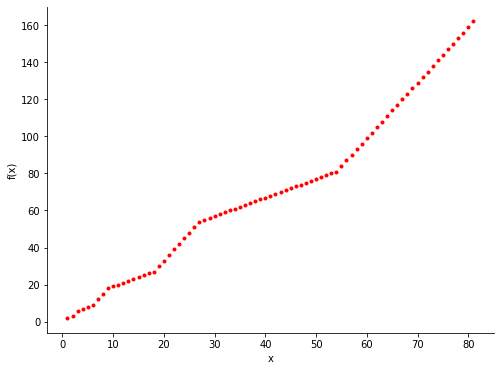

In [4]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(1,81,81)
y = np.array([ f(k) for k in x ] )

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1, 1, 1)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.set_xlabel('x')
ax.set_ylabel('f(x)')

plt.plot(x,y, '.r')
plt.show()